<a href="https://colab.research.google.com/github/mbmb7777/Anomaly-Detection/blob/main/Sensor_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content')
print(" Current Working Directory")
% pwd

 Current Working Directory


'/content'

In [ ]:
# Common imports
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


KeyboardInterrupt: ignored

In [ ]:
# Download a file based on its file ID
file_id = '1bljNTBDZr701KXs8wfPB6KAyi8dtM8QG'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('data.zip')
print('Downloaded Data File')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Sensor/H2S, NH3, NO2-Single (H2S)-data-as-seriestocolumns-2021-05-17 14_49_43.csv')
merged_data = pd.DataFrame()
merged_data=merged_data.append(dataset)
merged_data

,Time,온도,습도,H2S,NH3,NO2
0,2021-05-01 00:00:00,26,35,39,69,146
1,2021-05-01 00:10:00,26,35,49,73,143
2,2021-05-01 00:20:00,26,35,43,80,161
3,2021-05-01 00:30:00,26,35,27,71,149
4,2021-05-01 00:40:00,26,35,33,77,152
...,...,...,...,...,...,...
919,2021-05-08 23:00:00,26,33,21,65,146
920,2021-05-08 23:10:00,26,33,27,65,99
921,2021-05-08 23:20:00,26,33,16,71,120
922,2021-05-08 23:30:00,26,33,21,73,129


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Sensor/H2S, NH3, NO2-Single (H2S)-data-as-seriestocolumns-2021-05-17 14_49_43.csv')
merged_data = pd.DataFrame()
merged_data=merged_data.append(dataset)
merged_data
merged_data.set_index('Time', inplace=True)
merged_data.index = pd.to_datetime(merged_data.index)
merged_data

,온도,습도,H2S,NH3,NO2
Time,,,,,
2021-05-01 00:00:00,26,35,39,69,146
2021-05-01 00:10:00,26,35,49,73,143
2021-05-01 00:20:00,26,35,43,80,161
2021-05-01 00:30:00,26,35,27,71,149
2021-05-01 00:40:00,26,35,33,77,152
...,...,...,...,...,...
2021-05-08 23:00:00,26,33,21,65,146
2021-05-08 23:10:00,26,33,27,65,99
2021-05-08 23:20:00,26,33,16,71,120


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Sensor/H2S, NH3, NO2-Single (H2S)-data-as-seriestocolumns-2021-05-17 14_49_43.csv')
merged_data = pd.DataFrame()
merged_data=merged_data.append(dataset)

merged_data = pd.read_csv('/content/drive/MyDrive/Sensor/H2S, NH3, NO2-Single (H2S)-data-as-seriestocolumns-2021-05-17 14_49_43.csv', 


                          sep=",", 

                          names=['time','temp', 'moist','H2S','NH3','NO2'], 

                          index_col=['time'], # or 
                          #index_col=0

                          parse_dates=True, 

                          dayfirst=True,

                          infer_datetime_format=True)
merged_data

merged_data=merged_data.drop(['Time'])
merged_data=merged_data.astype(float)
merged_data.rename_axis(None, inplace=True)
merged_data

,temp,moist,H2S,NH3,NO2
2021-05-01 00:00:00,26.0,35.0,39.0,69.0,146.0
2021-05-01 00:10:00,26.0,35.0,49.0,73.0,143.0
2021-05-01 00:20:00,26.0,35.0,43.0,80.0,161.0
2021-05-01 00:30:00,26.0,35.0,27.0,71.0,149.0
2021-05-01 00:40:00,26.0,35.0,33.0,77.0,152.0
...,...,...,...,...,...
2021-05-08 23:00:00,26.0,33.0,21.0,65.0,146.0
2021-05-08 23:10:00,26.0,33.0,27.0,65.0,99.0
2021-05-08 23:20:00,26.0,33.0,16.0,71.0,120.0
2021-05-08 23:30:00,26.0,33.0,21.0,73.0,129.0


In [ ]:
# Check - Begining of Data
merged_data.head()

,temp,moist,H2S,NH3,NO2
2021-05-01 00:00:00,26.0,35.0,39.0,69.0,146.0
2021-05-01 00:10:00,26.0,35.0,49.0,73.0,143.0
2021-05-01 00:20:00,26.0,35.0,43.0,80.0,161.0
2021-05-01 00:30:00,26.0,35.0,27.0,71.0,149.0
2021-05-01 00:40:00,26.0,35.0,33.0,77.0,152.0


In [ ]:
# Check - End of Data
merged_data.tail()

,temp,moist,H2S,NH3,NO2
2021-05-08 23:00:00,26.0,33.0,21.0,65.0,146.0
2021-05-08 23:10:00,26.0,33.0,27.0,65.0,99.0
2021-05-08 23:20:00,26.0,33.0,16.0,71.0,120.0
2021-05-08 23:30:00,26.0,33.0,21.0,73.0,129.0
2021-05-08 23:50:00,26.0,33.0,10.0,65.0,114.0


In [ ]:
#Check Total Points
print(f'Total Data Points {merged_data.shape[0] + 1}')

Total Data Points 925


[Text(0, 0.5, 'Sensor Value'), Text(0.5, 0, 'Year-Month-Date')]

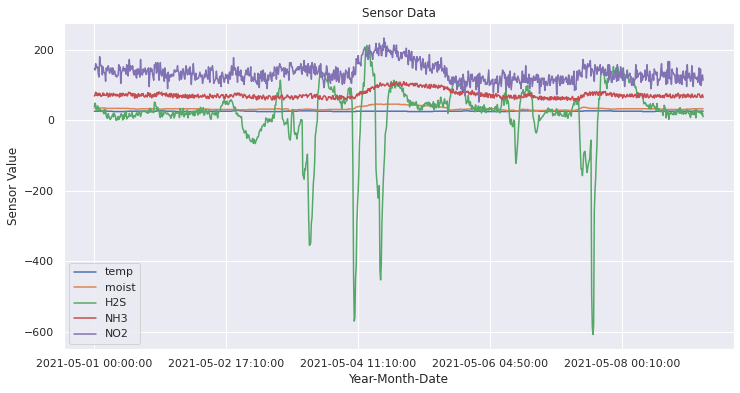

In [ ]:
# Visualising Data
ax = merged_data.plot(figsize = (12,6), title="Sensor Data" , legend = True)
ax.set(xlabel="Year-Month-Date", ylabel="Sensor Value")
#plt.axvline(x='2021-05-08 00:00:00', linewidth=4, color='b', label ="Breakdown of Bearing 1")
#plt.text('2004-02-19 06:12:39',0.3,'Breakdown of Bearing 1',rotation=90, fontsize=14, color='b')

[Text(0, 0.5, 'Vibration/Acceleration(g)'), Text(0.5, 0, 'Month-Date Time')]

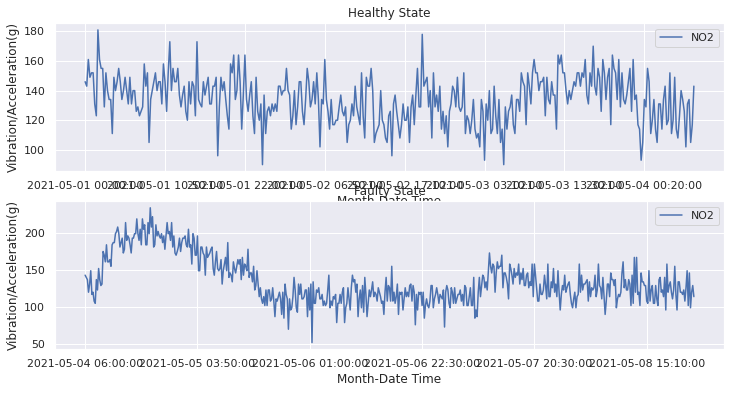

In [ ]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(211)
# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(212)

healthy = merged_data['2021-05-01 00:00:00':'2021-05-04 06:00:00']
ax1=healthy['NO2'].plot(figsize = (12,6), title="Healthy State" , legend = True, ax=ax1)
ax1.set(xlabel="Month-Date Time", ylabel="Vibration/Acceleration(g)")

faulty = merged_data['2021-05-04 06:00:00':'2021-05-08 23:50:00']
ax2 = faulty['NO2'].plot(figsize = (12,6), title="Faulty State" , legend = True, ax= ax2)
ax2.set(xlabel="Month-Date Time", ylabel="Vibration/Acceleration(g)")



In [ ]:
from fbprophet import Prophet

In [ ]:
NO2 = merged_data['2021-05-01 00:00:00':'2021-05-04 06:00:00']['NO2']

NO2.index=pd.to_datetime(NO2.index)           #시계열 오류 발생 시 index 조정
# Creating training dataframe
prophet_healthy_train = pd.DataFrame()
prophet_healthy_train['ds'] = NO2.index
prophet_healthy_train['y'] = NO2.values

prophet_healthy_train.head()
# H2S.rename_axis(None, inplace=True)
NO2


2021-05-01 00:00:00    146.0
2021-05-01 00:10:00    143.0
2021-05-01 00:20:00    161.0
2021-05-01 00:30:00    149.0
2021-05-01 00:40:00    152.0
                       ...  
2021-05-04 05:20:00    131.0
2021-05-04 05:30:00    134.0
2021-05-04 05:40:00    105.0
2021-05-04 05:50:00    117.0
2021-05-04 06:00:00    143.0
Name: NO2, Length: 382, dtype: float64

In [ ]:
m = Prophet(interval_width = 1)
# Using the training data from "healthy part"
m.fit(prophet_healthy_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
m

Displaying Prophet plot


[Text(55.5, 0.5, 'Sensor Value'), Text(0.5, 30.5, 'Month (MM)-Date(DD) Time')]

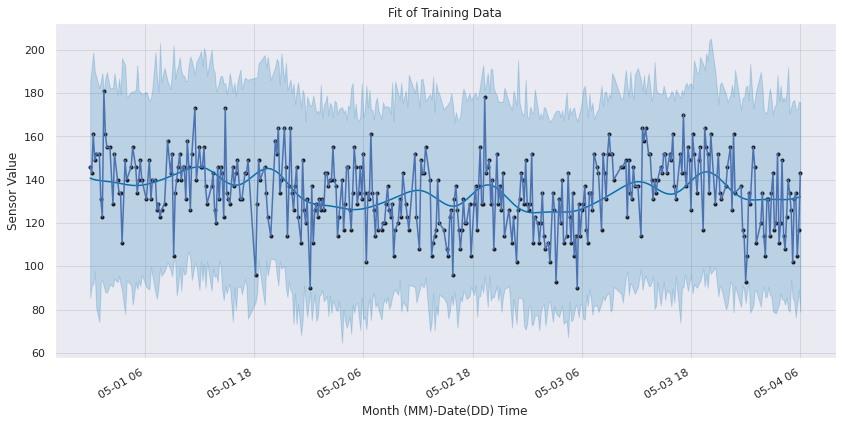

In [ ]:
forecast = m.predict(prophet_healthy_train)
forecast['NO2'] = prophet_healthy_train['y'].reset_index(drop = True)
print('Displaying Prophet plot')
fig1 = m.plot(forecast)
fig1 = NO2.plot(figsize = (12,6), title="Fit of Training Data")
fig1.set(xlabel="Month (MM)-Date(DD) Time", ylabel="Sensor Value")


Displaying Prophet plot


[Text(55.5, 0.5, 'Sensor Value'), Text(0.5, 30.5, 'Month (MM)-Date(DD) Time')]

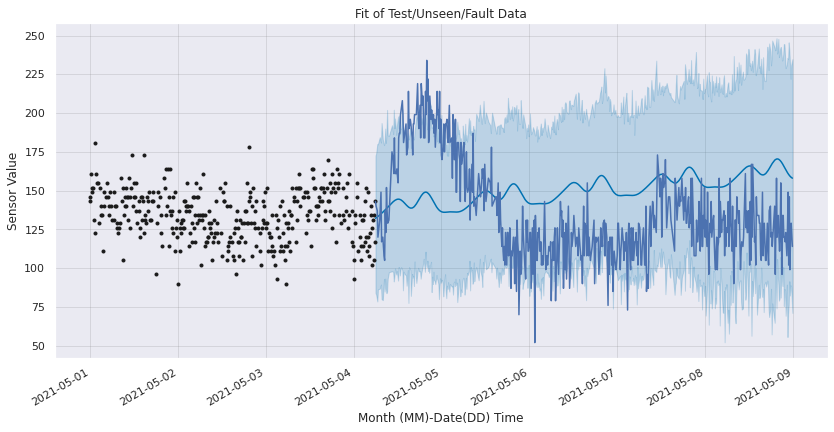

In [ ]:
prophet_faultydata = merged_data['2021-05-04 06:00:00':'2021-05-08 23:50:00']['NO2']
prophet_faultydata.head()

prophet_faulty_test = pd.DataFrame()
prophet_faultydata.index=pd.to_datetime(prophet_faultydata.index)
prophet_faulty_test['ds'] = prophet_faultydata.index
#pd.to_datetime(prophet_healthy.index, format='%Y.%m.%d.%H.%M.%S')
prophet_faulty_test['y'] = prophet_faultydata.values

forecast = m.predict(prophet_faulty_test)
forecast['fact'] = prophet_faulty_test['y'].reset_index(drop = True)
print('Displaying Prophet plot')
fig1 = m.plot(forecast)
fig1 = prophet_faultydata.plot(figsize = (12,6),title="Fit of Test/Unseen/Fault Data")
fig1.set(xlabel="Month (MM)-Date(DD) Time", ylabel="Sensor Value")
#fig1.text(731626.875,0.057,'Expected/Predicted', fontsize=14, color='r')
#fig1.text(731626.875,0.075,'Actual/Faulty Data', fontsize=14, color='r')
#fig1.text(731624.875,0.057,'Actual/Healthy', fontsize=14, color='r')

In [ ]:
# Healper functions to annotate the graph.
print(fig1.get_xticks())
print(fig1.get_yticks())

[737911. 737912. 737913. 737914. 737915. 737916. 737917. 737918.]
[-800. -600. -400. -200.    0.  200.  400.]


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
530,2021-05-07 23:20:00,-223.345005,-357.399172,-96.618370
531,2021-05-07 23:30:00,-224.582424,-360.756736,-86.266223
532,2021-05-07 23:40:00,-225.688767,-352.875536,-89.749222
533,2021-05-07 23:50:00,-226.662824,-343.974676,-75.942368
534,2021-05-08 00:00:00,-227.504247,-368.106741,-94.645342


## NH3

[Text(0, 0.5, 'Vibration/Acceleration(g)'), Text(0.5, 0, 'Month-Date Time')]

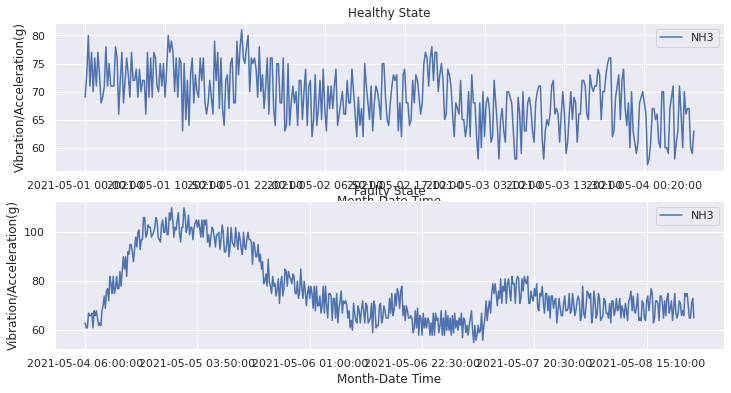

In [ ]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(211)
# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(212)

healthy = merged_data['2021-05-01 00:00:00':'2021-05-04 06:00:00']
ax1=healthy['NH3'].plot(figsize = (12,6), title="Healthy State" , legend = True, ax=ax1)
ax1.set(xlabel="Month-Date Time", ylabel="Vibration/Acceleration(g)")

faulty = merged_data['2021-05-04 06:00:00':'2021-05-08 23:50:00']
ax2 = faulty['NH3'].plot(figsize = (12,6), title="Faulty State" , legend = True, ax= ax2)
ax2.set(xlabel="Month-Date Time", ylabel="Vibration/Acceleration(g)")



In [ ]:
NH3 = merged_data['2021-05-01 00:00:00':'2021-05-04 06:00:00']['NH3']

NH3.index=pd.to_datetime(NH3.index)           #시계열 오류 발생 시 index 조정
# Creating training dataframe
prophet_healthy_train = pd.DataFrame()
prophet_healthy_train['ds'] = NH3.index
prophet_healthy_train['y'] = NH3.values

prophet_healthy_train.head()
# H2S.rename_axis(None, inplace=True)
NH3


2021-05-01 00:00:00    69.0
2021-05-01 00:10:00    73.0
2021-05-01 00:20:00    80.0
2021-05-01 00:30:00    71.0
2021-05-01 00:40:00    77.0
                       ... 
2021-05-04 05:20:00    67.0
2021-05-04 05:30:00    67.0
2021-05-04 05:40:00    60.0
2021-05-04 05:50:00    59.0
2021-05-04 06:00:00    63.0
Name: NH3, Length: 382, dtype: float64

In [ ]:
m = Prophet(interval_width = 1)
# Using the training data from "healthy part"
m.fit(prophet_healthy_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
m

Displaying Prophet plot


[Text(62.5, 0.5, 'Sensor Value'), Text(0.5, 30.5, 'Month (MM)-Date(DD) Time')]

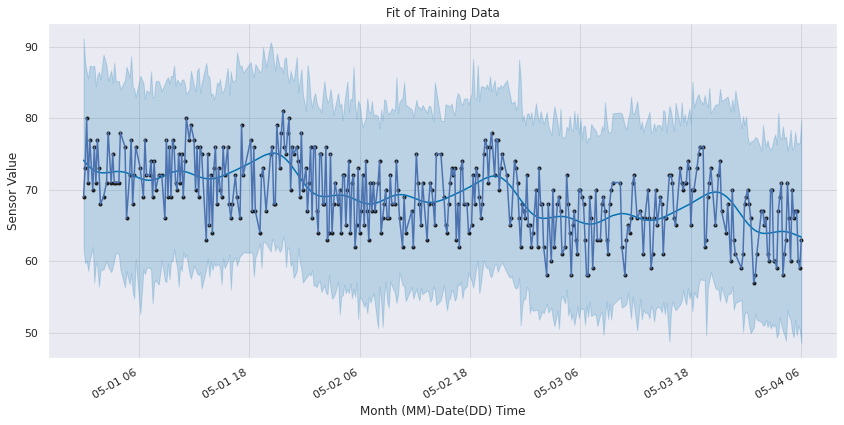

In [ ]:
forecast = m.predict(prophet_healthy_train)
forecast['NH3'] = prophet_healthy_train['y'].reset_index(drop = True)
print('Displaying Prophet plot')
fig1 = m.plot(forecast)
fig1 = NH3.plot(figsize = (12,6), title="Fit of Training Data")
fig1.set(xlabel="Month (MM)-Date(DD) Time", ylabel="Sensor Value")


Displaying Prophet plot


[Text(62.5, 0.5, 'Sensor Value'), Text(0.5, 30.5, 'Month (MM)-Date(DD) Time')]

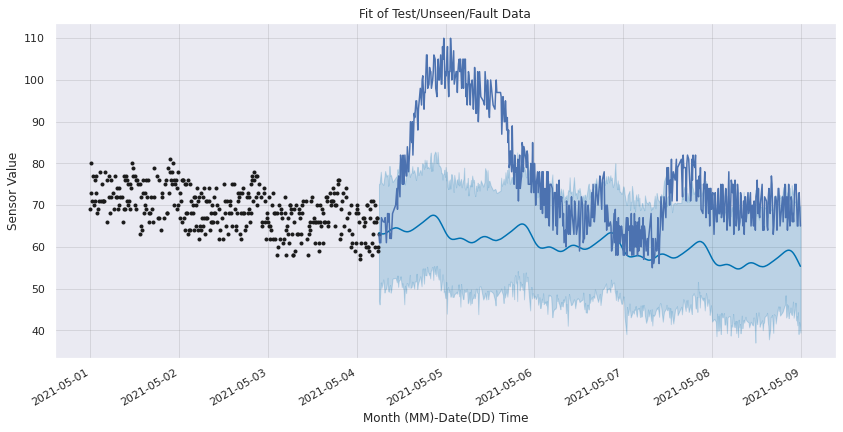

In [ ]:
prophet_faultydata = merged_data['2021-05-04 06:00:00':'2021-05-08 23:50:00']['NH3']
prophet_faultydata.head()

prophet_faulty_test = pd.DataFrame()
prophet_faultydata.index=pd.to_datetime(prophet_faultydata.index)
prophet_faulty_test['ds'] = prophet_faultydata.index
#pd.to_datetime(prophet_healthy.index, format='%Y.%m.%d.%H.%M.%S')
prophet_faulty_test['y'] = prophet_faultydata.values

forecast = m.predict(prophet_faulty_test)
forecast['fact'] = prophet_faulty_test['y'].reset_index(drop = True)
print('Displaying Prophet plot')
fig1 = m.plot(forecast)
fig1 = prophet_faultydata.plot(figsize = (12,6),title="Fit of Test/Unseen/Fault Data")
fig1.set(xlabel="Month (MM)-Date(DD) Time", ylabel="Sensor Value")
#fig1.text(731626.875,0.057,'Expected/Predicted', fontsize=14, color='r')
#fig1.text(731626.875,0.075,'Actual/Faulty Data', fontsize=14, color='r')
#fig1.text(731624.875,0.057,'Actual/Healthy', fontsize=14, color='r')

In [ ]:
# Healper functions to annotate the graph.
print(fig1.get_xticks())
print(fig1.get_yticks())